In [23]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.3/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 1.0/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 1.7/124.9 MB 8.3 MB/s eta 0:00:15
    --------------------------------------- 2.3/124.9 MB 9.9 MB/s eta 0:00:13
    --------------------------------------- 2.8/124.9 MB 9.4 MB/s eta 0:00:14
   - -------------------------------------- 3.3/124.9 MB 9.7 MB/s eta 0:00:13
   - -------------------------------------- 4.0/124.9 MB 10.1 MB/s eta 0:00:12
   - -------------------------------------- 4.6/124.9 MB 10.5 MB/s eta 0:00:12
   - -------------------------------------- 5.3/124.9 MB 10.9 MB/s eta 0:00:11
   - -------------------------------------- 5.9/124.9 MB 11.1 MB/s eta 0:

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

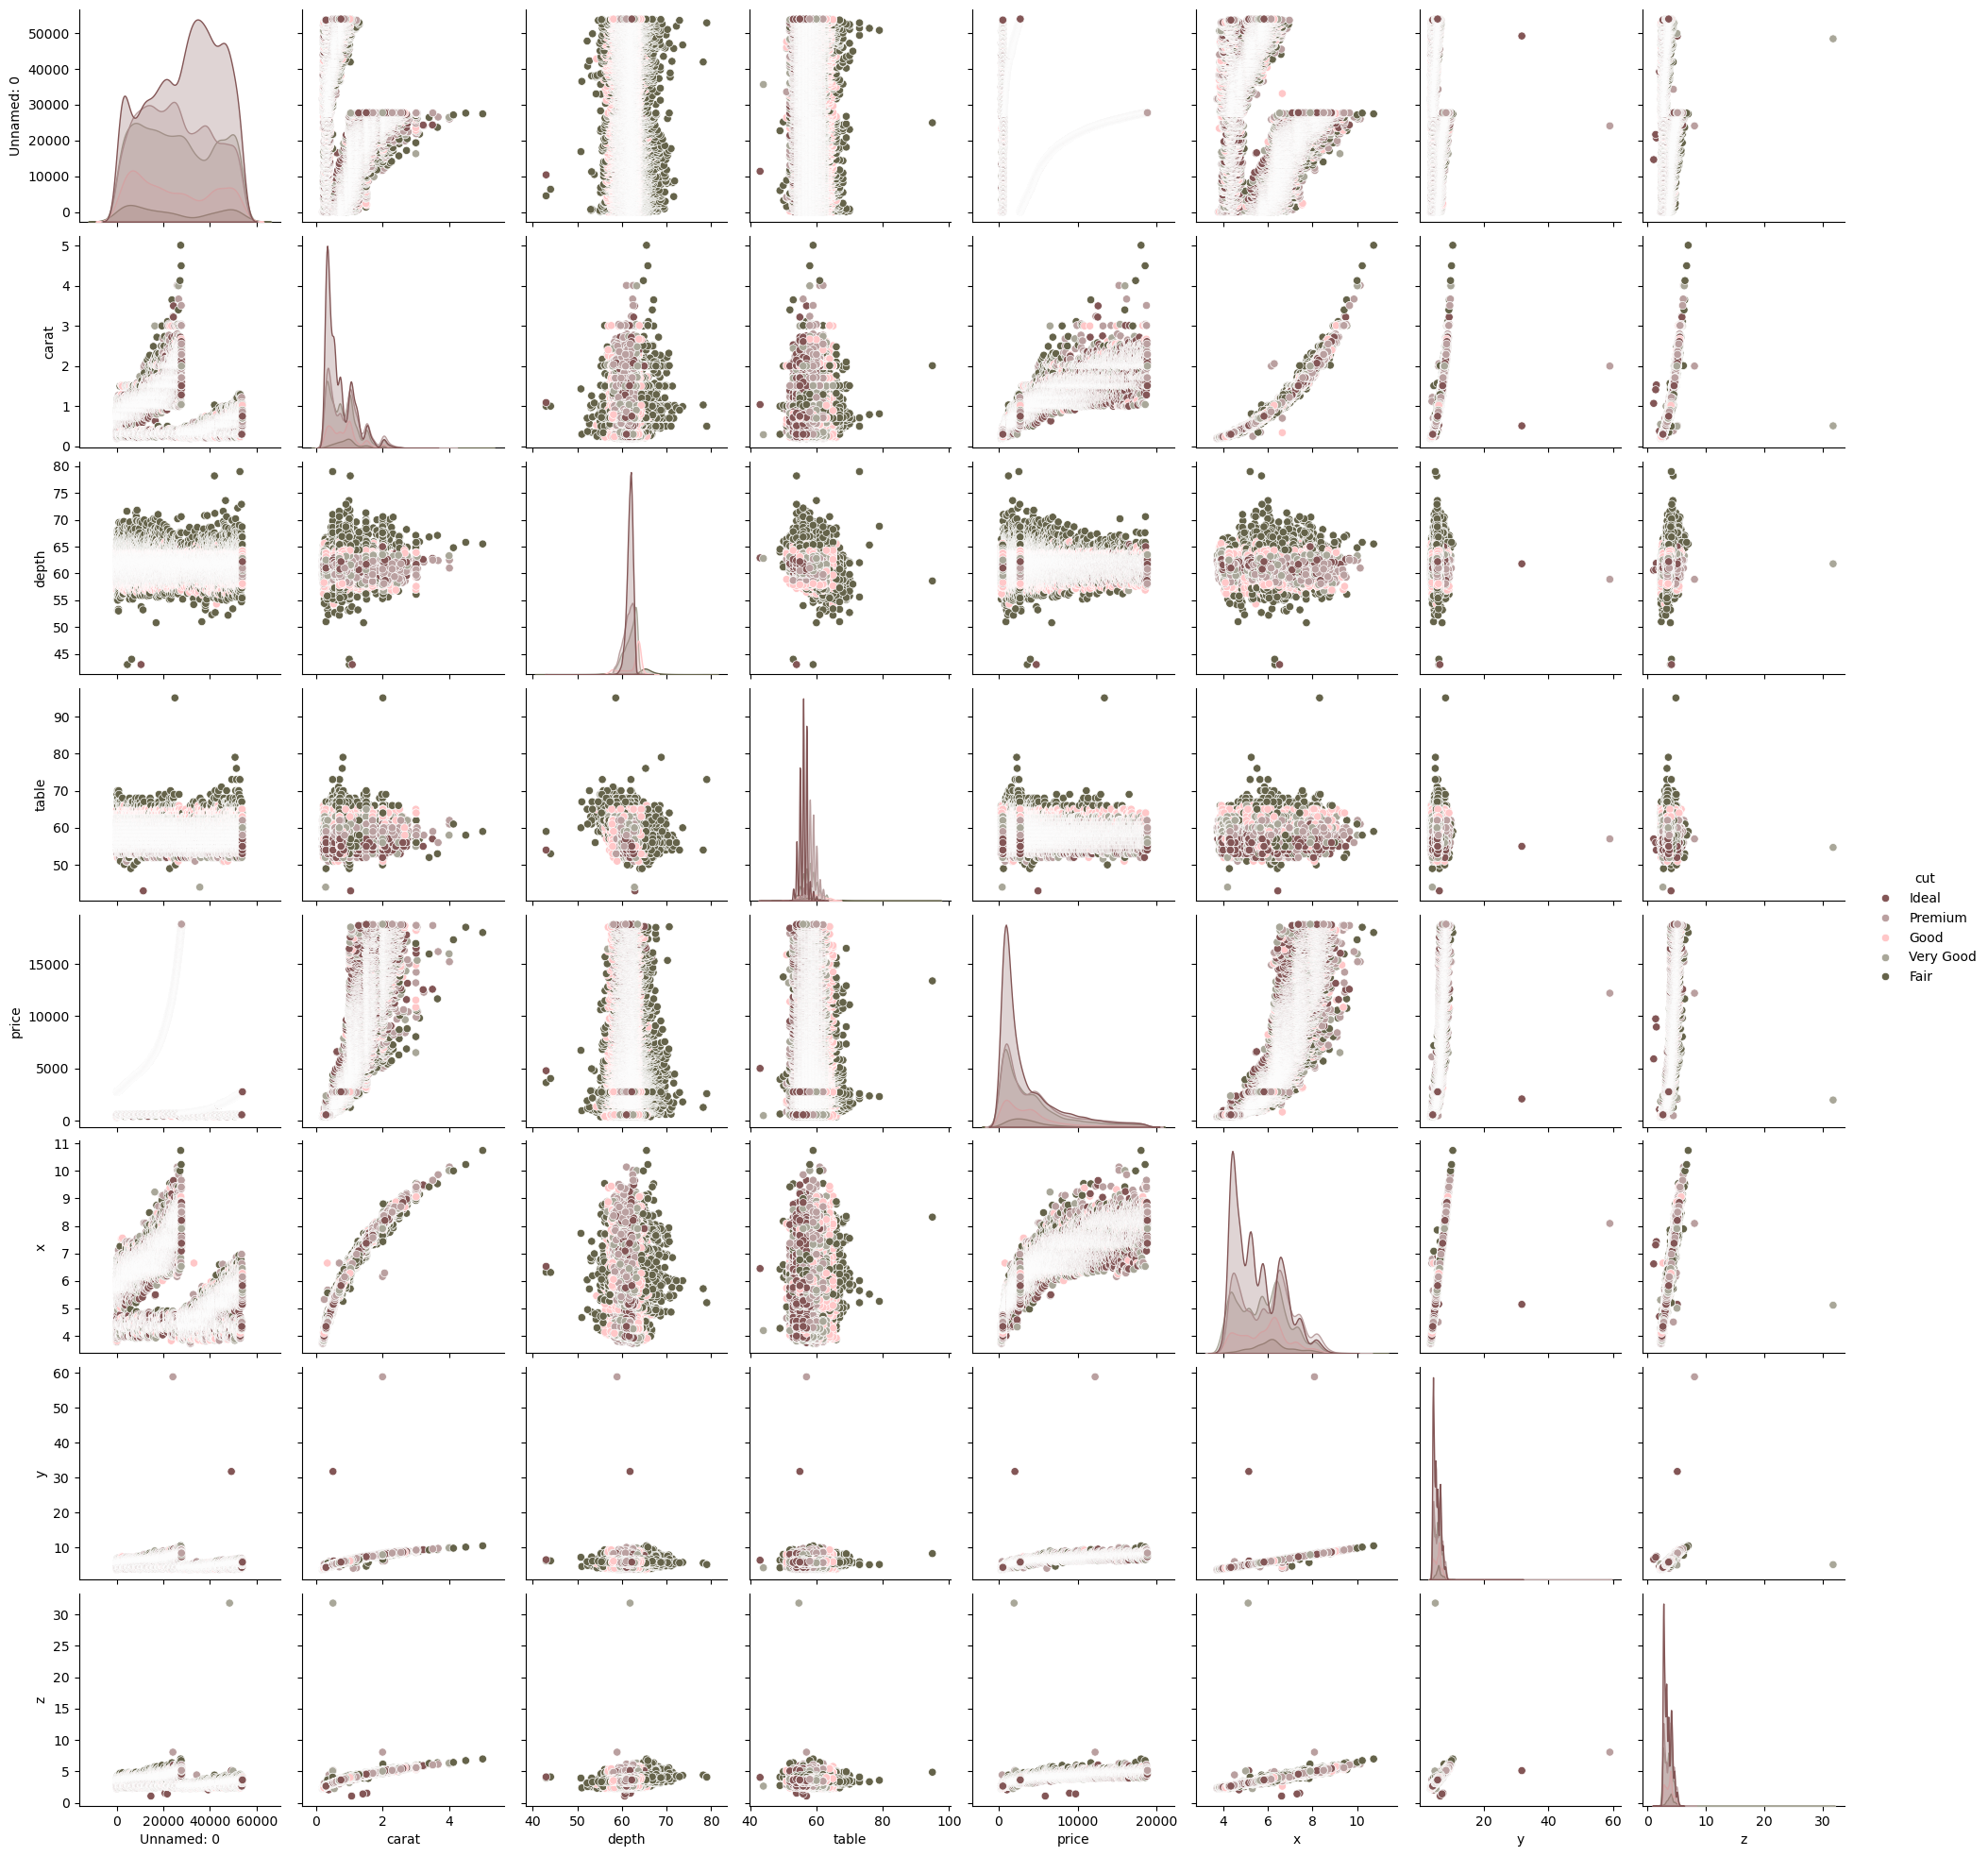

In [31]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, 
                  hue= "cut",palette=shade)

In [32]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

In [33]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [34]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

<Axes: >

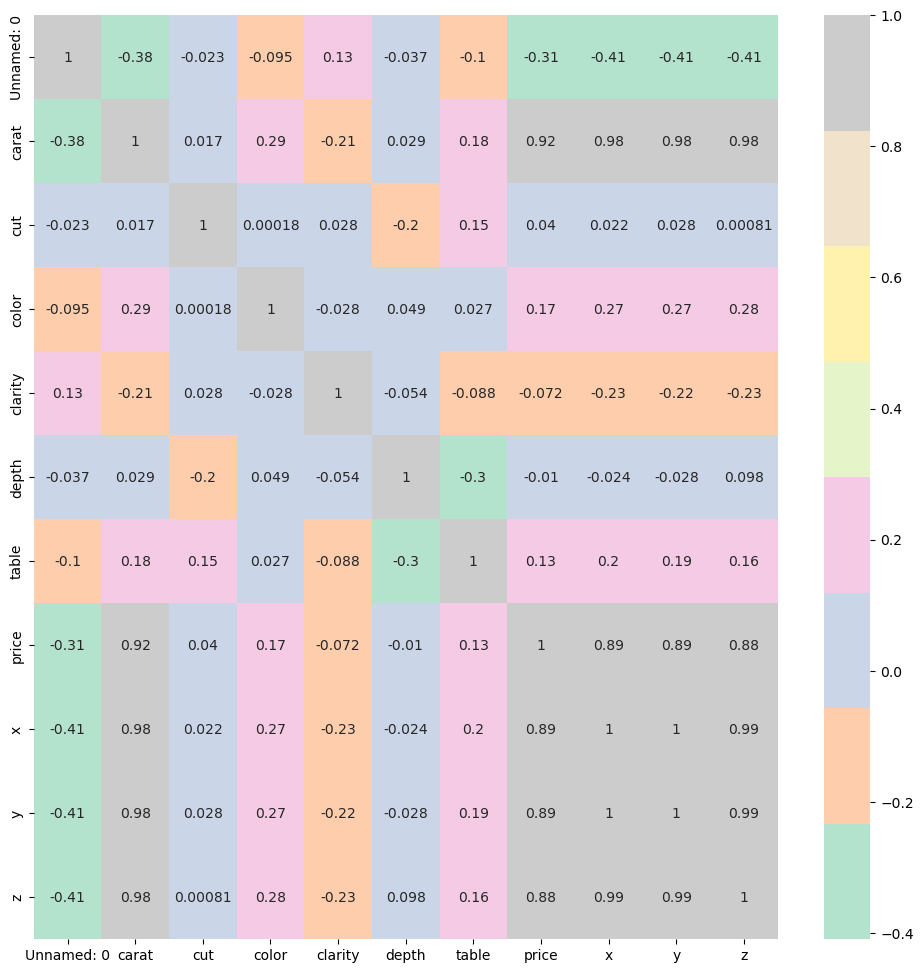

In [35]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

In [36]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1344.798387 
DecisionTree: -52.376205 
  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.6.1-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Metaphone-0.6-py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build whee

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  deleting levenshtein.egg-info\entry_points.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing 

RandomForest: -37.599763 
KNeighbors: -666.216132 
XGBRegressor: -60.549487 


In [43]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.999679646529799
Adjusted R^2: 0.9996794086317816
MAE: 26.64934959816386
MSE: 5025.648942782768
RMSE: 70.89181153548532
